## EKF

### 1) Inputs/Parameters

In [8]:
from ekf import run_ekf, Ekf, State
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Simple 4d state (x, y, vx, vy)
# Measurement is (x, y)

# State
x0 = np.array([0,0,0,0])
P0 = np.diag(np.array([250, 250, 5, 5]))

# Model
F = np.array([
    [0,0,1,0],
    [0,0,0,1],
    [0,0,0,0],
    [0,0,0,0]
])
B = np.ones((4,1)) # No input but still need something
H = np.array([
    [1,0,0,0],
    [0,1,0,0]
])

# Noise
# Q = np.diag(np.array([10, 10, 10, 10]))
Q = np.diag(np.array([0.1, 0.1, 0.1, 0.1]))
R = 5 * np.eye(2) # Since 2 measurements

ekf = Ekf(F, B, H, Q, R, 4)
state = State(x0, P0, 4)


In [10]:
dt = 0.1
t_max = 50
n = int(t_max // dt)
t = np.arange(0, t_max, dt)

x = 50 * np.sin(t/50*2*np.pi)
y = 50 * np.cos(t/50*2*np.pi)

x_true = np.vstack((x,y)).T
print(np.shape(x_true))

(500, 2)


In [11]:
x_arr = np.zeros((n+1,4))
err = np.zeros((n+1,2))
# P_arr = np.zeros((n,4))

# no_input = np.zeros(1)
no_input = np.array([200])

for i in range(n):
    x_arr[i,:] = state.x
    # P_arr[i,:] = state.P
    z = x_true[i,:]
    state = run_ekf(state, ekf, no_input, z)
    err[i,:] = z - state.x[0:2]

# state: State, ekf: Ekf, u: np.ndarray, z: np.ndarray):

(350.0, 400.0)

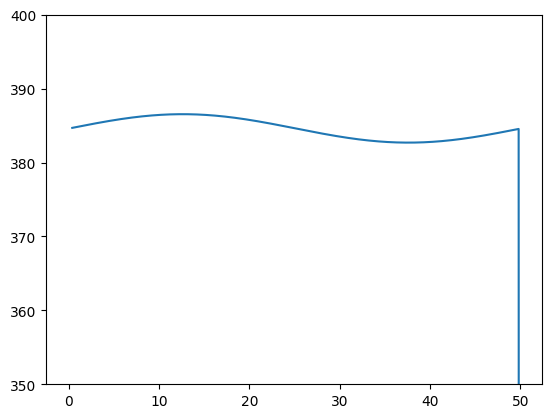

In [14]:

plt.plot(t[4:], x_arr[4:,0])
# print(x_arr[:4,0])
plt.plot(t, x_true[:,0])
# plt.plot(t, err[:,0])
# plt.plot(x_arr[0,:])
plt.ylim(350,400)

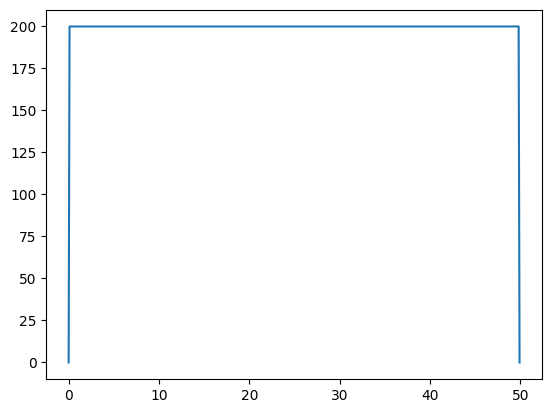

In [13]:
plt.plot(t, x_arr[:,3])
# plt.plot(t, x_true[:,1])